In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(gmodels)
library(gridExtra)
library(moments)
library(corrplot)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.92 loaded



[1] "tabular-playground-series-may-2022"

# May playground EDA in R
 
 In this notebook I do an initial EDA in R for the May Kaggle Tabular playground. 


# Initial data load
First let's read in the data and get an overview of it

In [2]:
#Read in the data
df1 <- read_csv('../input/tabular-playground-series-may-2022/train.csv')

Rows: 900000 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): f_27
dbl (32): id, f_00, f_01, f_02, f_03, f_04, f_05, f_06, f_07, f_08, f_09, f_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Get an overview of the columns and datatypes
str(df1)

spec_tbl_df [900,000 × 33] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id    : num [1:900000] 0 1 2 3 4 5 6 7 8 9 ...
 $ f_00  : num [1:900000] -1.373 1.697 1.682 -0.118 1.148 ...
 $ f_01  : num [1:900000] 0.239 -1.71 0.617 -0.588 -0.177 ...
 $ f_02  : num [1:900000] -0.243 -2.23 -1.028 -0.805 -0.665 ...
 $ f_03  : num [1:900000] 0.567 -0.546 0.81 2.087 -1.101 ...
 $ f_04  : num [1:900000] -0.648 1.113 -0.609 0.371 0.468 ...
 $ f_05  : num [1:900000] 0.839 -1.552 0.114 -0.129 0.5 ...
 $ f_06  : num [1:900000] 0.113 0.448 -0.709 -0.283 0.408 ...
 $ f_07  : num [1:900000] 1 1 1 3 3 6 2 2 3 2 ...
 $ f_08  : num [1:900000] 5 3 0 2 3 2 5 3 2 0 ...
 $ f_09  : num [1:900000] 1 4 2 1 0 4 3 4 1 2 ...
 $ f_10  : num [1:900000] 3 0 6 0 4 2 0 4 7 1 ...
 $ f_11  : num [1:900000] 3 2 6 1 3 1 2 1 4 1 ...
 $ f_12  : num [1:900000] 3 3 4 6 0 6 1 6 3 1 ...
 $ f_13  : num [1:900000] 1 0 3 4 6 3 1 4 5 2 ...
 $ f_14  : num [1:900000] 6 1 1 2 0 1 2 1 2 0 ...
 $ f_15  : num [1:900000] 1 0 2 3 3 1 1 2 3 3 ...


All bar one of the columns is numerical.

In [4]:
#Data frame with only numerical columns

df1num <- df1 %>%
select(starts_with('f'), target) %>%
select(-f_27)

#Data frame with only categorical variables
df1cat <- df1 %>%
select(f_27)

# Univariate analysis
First let's analysis each column independently

# Target variable analysis
First let's understand the target variable

In [5]:
# Understand the distribution of the target variable 
df1 %>%
count(target)

target,n
<dbl>,<int>
0,462161
1,437839


The data is broadly balanced, no further sampling required.

# Missing value analysis
Next let's understand what proportion of the data is missing for each column. 

In [6]:
#Understand how many missing values there are by column.
sapply(X = df1, FUN = function(x) sum(is.na(x)))

id   f_00   f_01   f_02   f_03   f_04   f_05   f_06   f_07   f_08   f_09 
     0      0      0      0      0      0      0      0      0      0      0 
  f_10   f_11   f_12   f_13   f_14   f_15   f_16   f_17   f_18   f_19   f_20 
     0      0      0      0      0      0      0      0      0      0      0 
  f_21   f_22   f_23   f_24   f_25   f_26   f_27   f_28   f_29   f_30 target 
     0      0      0      0      0      0      0      0      0      0      0

There are no missing values - great - pre-processing missing values won't be required.  Given there are no missing values - there is no need to analysis missing values by row.

# Numerical value analysis
Next let's understand the distribution of each numerical variable.

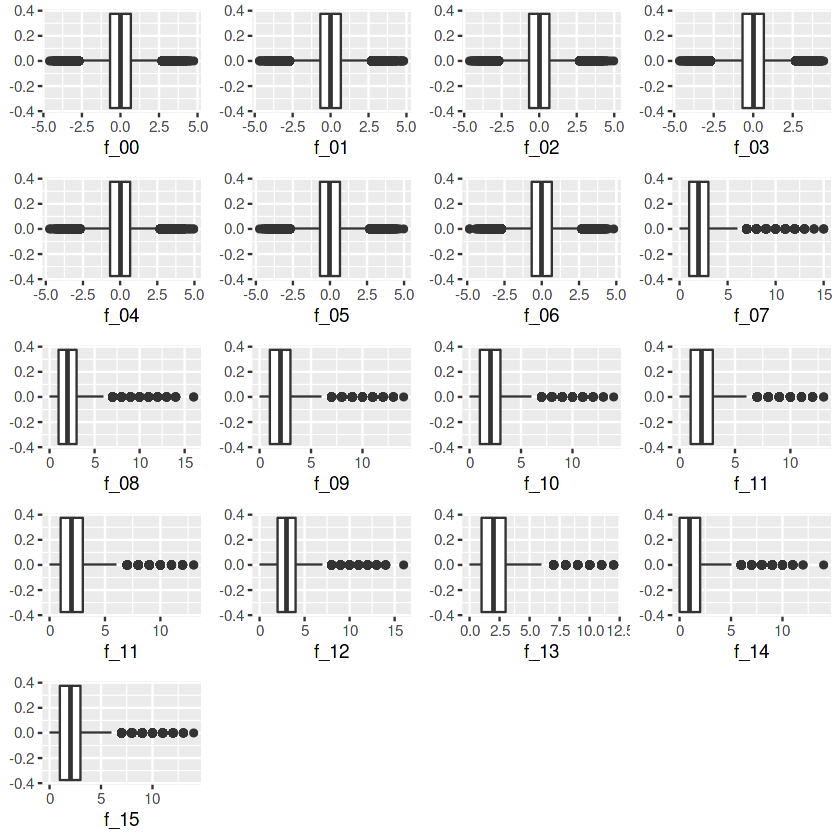

In [7]:
#Analyse the distrubtion for the first 15 variables
f_00p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_00))

f_01p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_01))

f_02p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_02))

f_03p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_03))

f_04p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_04))

f_05p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_05))

f_06p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_06))

f_07p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_07))

f_08p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_08))

f_09p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_09))

f_10p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_10))

f_11p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_11))

f_12p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_12))

f_13p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_13))

f_14p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_14))

f_15p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_15))

grid.arrange(f_00p,f_01p, f_02p, f_03p,f_04p,f_05p,f_06p,f_07p,f_08p,f_09p,f_10p,f_11p,f_11p,f_12p,f_13p, f_14p, f_15p)

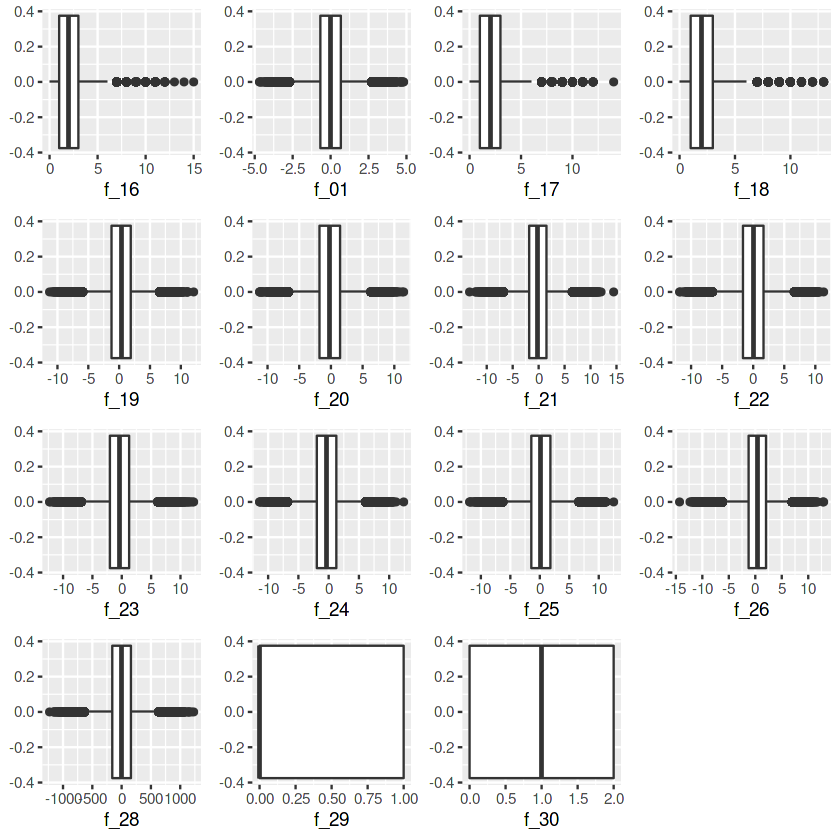

In [8]:
#Analyse the distrubtion for the next 14 variables
f_16p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_16))

f_17p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_17))

f_18p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_18))

f_19p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_19))

f_20p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_20))

f_21p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_21))

f_22p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_22))

f_23p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_23))

f_24p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_24))

f_25p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_25))

f_26p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_26))

f_28p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_28))

f_29p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_29))

f_30p <- df1 %>%
ggplot() +
geom_boxplot(aes(f_30))



grid.arrange(f_16p,f_01p, f_17p, f_18p,f_19p,f_20p,f_21p,f_22p,f_23p,f_24p,f_25p,f_26p,f_28p,f_29p, f_30p)

Unsurprsingly there are quite a few outliers for many of the features.  The boxplot for many variables also looks quite skewed. Feature 29 and 30 also look odd - let's investigate further. First, let's look at the skew. 

In [9]:
#Analyse skew for the numerical variables
x  <- skewness(df1num)
sort(x)

f_26          f_22          f_19          f_02          f_28 
-0.1208774538 -0.0786369451 -0.0592021635 -0.0065413288 -0.0055410246 
         f_30          f_25          f_00          f_01          f_05 
-0.0048912651 -0.0029839984 -0.0027200455 -0.0015580619 -0.0011302922 
         f_06          f_24          f_21          f_03          f_04 
 0.0001511238  0.0010505186  0.0026879042  0.0030947058  0.0054476392 
         f_20          f_23        target          f_12          f_29 
 0.0102048512  0.0502944213  0.0540686362  0.6317197933  0.6490508726 
         f_13          f_09          f_16          f_10          f_18 
 0.7163416681  0.7501611937  0.7882604925  0.8088313323  0.8162341543 
         f_15          f_17          f_08          f_07          f_11 
 0.8325010707  0.8406862363  0.9002127258  0.9584599411  0.9718116336 
         f_14 
 1.0110437517

Some of the features are highly skewed as we suspected from the boxplots. Next let's look at feature 29 and 30 in more detail.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



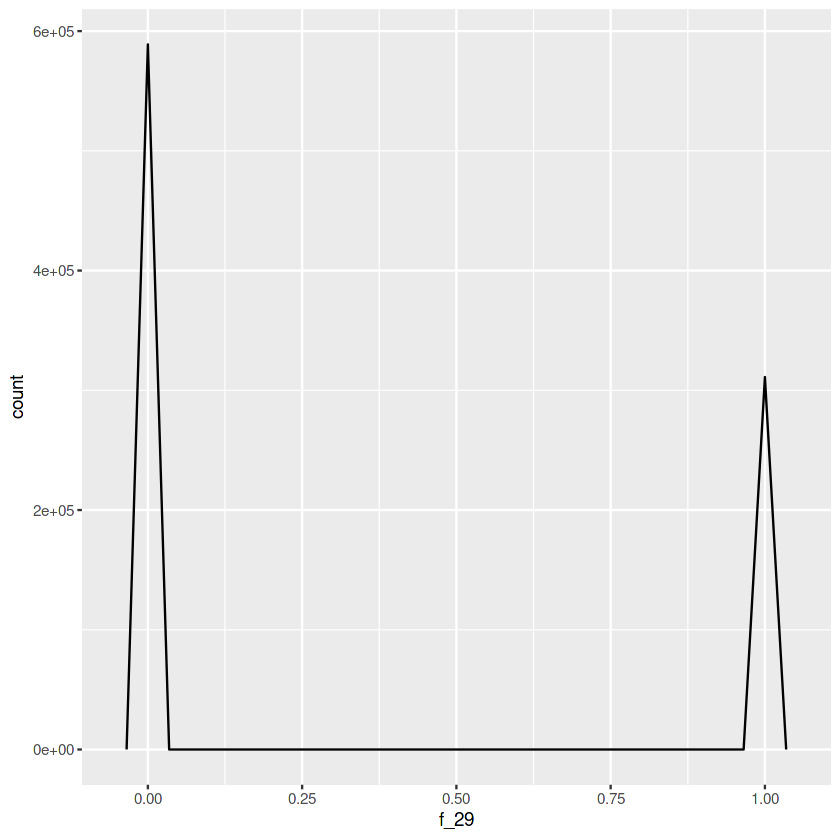

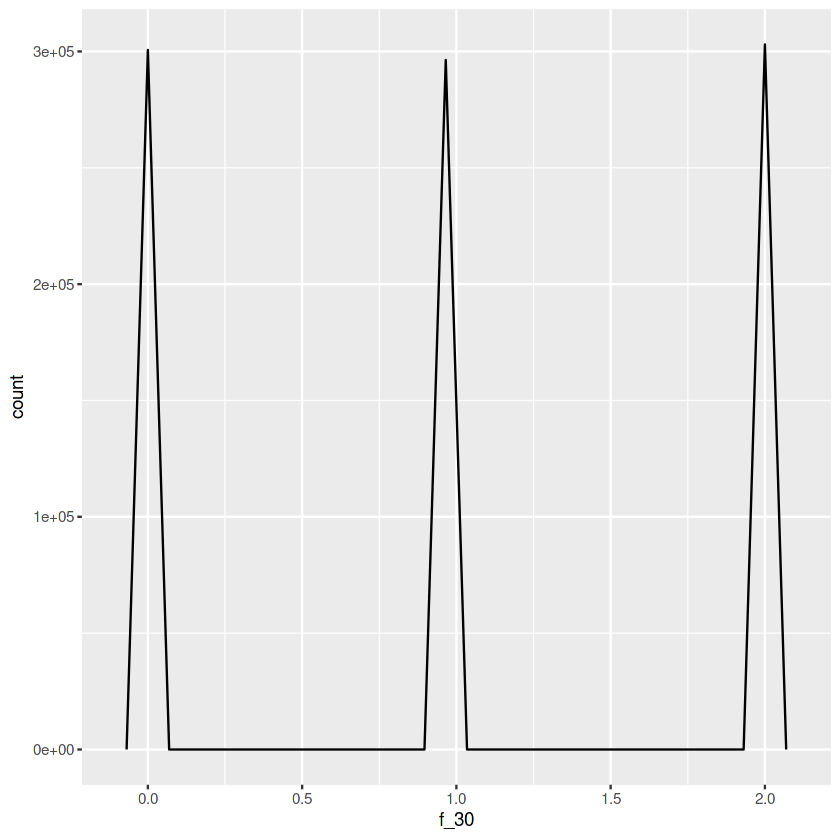

In [10]:
#Analyse feature 29 and 30 in more detail

f_29fq <- df1 %>%
select(f_29) %>%
ggplot() +
geom_freqpoly(aes(f_29))

f_30fq <- df1 %>%
select(f_30) %>%
ggplot() +
geom_freqpoly(aes(f_30))

print(f_29fq)
print(f_30fq)

f29 can either be 1 or 0 and f30 can be 0, 1, or 2 hence why the boxplot was looking odd.

# Categorical variable analysis
Next let's look at the categorical variables.

In [11]:
# Identify how many unique values there are 
unique(df1cat)

f_27
<chr>
ABABDADBAB
ACACCADCEB
AAAEABCKAD
BDBBAACBCB
BDBCBBCHFE
BDAEDBDEDA
ACBCAAAHHE
BBBDBBEPDB
ACAEBADDAA


This is unlikely to be useful in predicting the target variable as there are so mamy unique values.

# Bivariate analysis

Next let's look at the relationship between the numerical values.

In [12]:
#Analyse the correlation in a table
df1num %>%
cor(method = 'pearson')

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,⋯,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
f_00,1.000000e+00,-3.029268e-04,1.898518e-03,-8.408695e-04,-5.443499e-04,0.0003052142,-1.311998e-03,0.0008313941,-0.0025530470,7.812321e-05,⋯,1.069175e-03,-1.079445e-03,0.0002690085,1.894905e-03,0.0005088978,1.165524e-04,1.893688e-01,2.742175e-04,-9.956432e-04,0.0552739119
f_01,-3.029268e-04,1.000000e+00,5.005876e-04,-8.330180e-04,-8.324314e-04,0.0006355812,-4.408471e-04,-0.0012203848,-0.0002917249,-5.662061e-04,⋯,-1.634543e-03,-4.623292e-04,-0.0006456421,-9.696998e-04,-0.0001150912,2.033327e-03,1.939397e-01,-5.555244e-04,-7.006210e-05,0.0550112880
f_02,1.898518e-03,5.005876e-04,1.000000e+00,7.919109e-04,6.712222e-05,-0.0011091112,8.935360e-04,0.0012055895,0.0003391690,1.717954e-03,⋯,-2.151656e-04,-3.187480e-04,-0.0000177256,-3.351693e-06,-0.0008941694,5.735575e-04,2.091821e-01,-1.451051e-03,-2.346614e-05,0.0318144326
f_03,-8.408695e-04,-8.330180e-04,7.919109e-04,1.000000e+00,1.048679e-03,0.0027684006,-1.092022e-03,0.0011138846,-0.0001237812,4.842474e-04,⋯,-8.178876e-05,5.026196e-04,0.0014134666,2.853546e-03,0.0017835589,7.125236e-04,3.288955e-01,-6.242440e-04,2.390191e-04,-0.0001922794
f_04,-5.443499e-04,-8.324314e-04,6.712222e-05,1.048679e-03,1.000000e+00,0.0001940528,-3.116172e-04,0.0012269797,-0.0002505764,2.477920e-03,⋯,3.656532e-04,1.751264e-03,-0.0022007443,6.010760e-04,-0.0019806799,-5.203876e-04,1.704842e-01,-1.121994e-03,4.748918e-04,0.0001591603
f_05,3.052142e-04,6.355812e-04,-1.109111e-03,2.768401e-03,1.940528e-04,1.0000000000,2.326784e-04,0.0004074788,-0.0004213833,-3.354158e-04,⋯,7.380428e-04,1.340912e-03,-0.0004738263,-1.732712e-03,0.0013162485,1.218214e-03,2.958988e-01,-1.412364e-03,-6.841481e-04,0.0330481134
f_06,-1.311998e-03,-4.408471e-04,8.935360e-04,-1.092022e-03,-3.116172e-04,0.0002326784,1.000000e+00,-0.0008775874,-0.0006345733,-9.082103e-04,⋯,-2.743217e-04,-1.500815e-04,0.0002335372,-2.099122e-03,0.0006699472,2.083776e-05,1.648064e-01,7.059704e-04,7.235855e-04,-0.0009648454
f_07,8.313941e-04,-1.220385e-03,1.205589e-03,1.113885e-03,1.226980e-03,0.0004074788,-8.775874e-04,1.0000000000,0.1127070590,6.641350e-03,⋯,1.220300e-03,-5.191392e-04,0.0042408431,1.596402e-03,-0.0008393061,-3.758576e-03,9.774498e-04,-4.816318e-02,1.686197e-04,0.0052571264
f_08,-2.553047e-03,-2.917249e-04,3.391690e-04,-1.237812e-04,-2.505764e-04,-0.0004213833,-6.345733e-04,0.1127070590,1.0000000000,-6.670392e-02,⋯,3.471292e-03,-1.516120e-03,0.0028349150,3.349191e-03,-0.0016228697,-2.667822e-03,-2.035804e-04,6.492696e-02,3.355089e-04,0.0358285131
f_09,7.812321e-05,-5.662061e-04,1.717954e-03,4.842474e-04,2.477920e-03,-0.0003354158,-9.082103e-04,0.0066413501,-0.0667039177,1.000000e+00,⋯,6.033884e-03,-1.698083e-03,0.0091214939,9.869022e-03,-0.0057048920,-9.222082e-03,-7.036239e-04,-1.043248e-01,-1.390769e-03,0.0679091078


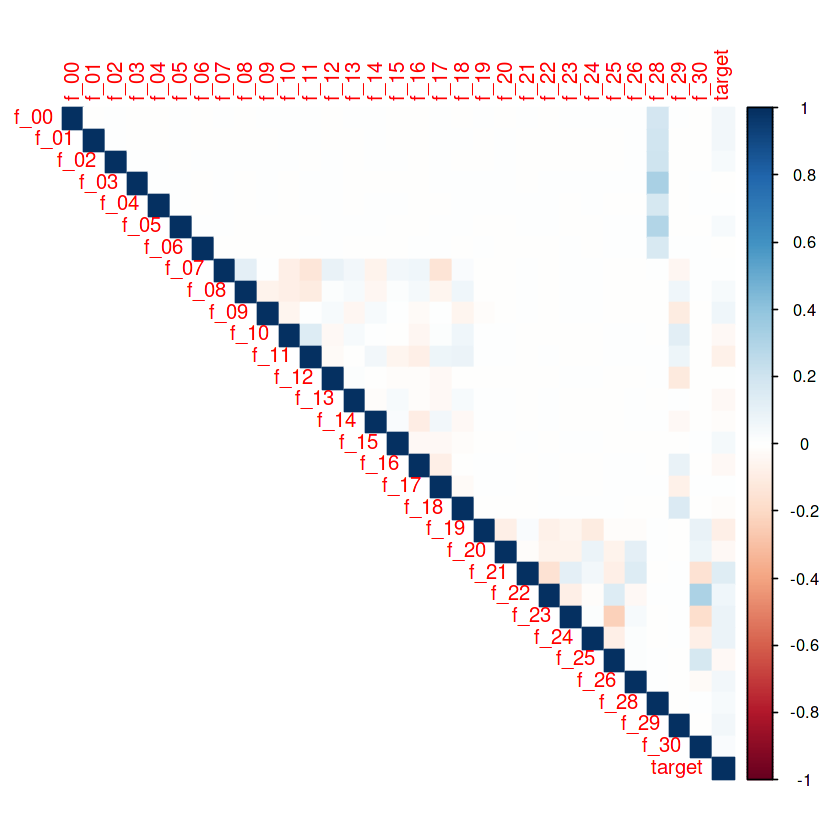

In [13]:
#Analyse the correlation in a graph
df1num %>%
cor() %>%
corrplot(method = 'color', type = 'upper')

None of the features on their own seem to correlate the target very strongly. 

# Summary of pre-processing required

* Feature scaling of numerical values
* Removal of f_027
* Removal of outliers